# matplotlibに日本語フォントのインストール

* http://ipafont.ipa.go.jp/old/ipafont/download.html
    * ipag00303.zipをダウンロード
* 解凍してできたipag.ttcを~/.fontsディレクトリに移動 (Ubuntu)
    * 例
        * mkdir ~/.fonts
        * unzip ipag00303.zip
        * mv ipag00303/ipag.ttf ~/.fonts
* matplotlibrcの末尾に「font.family : IPAGothic」を追記する
    * 例
        * vi /usr/local/pyenv/versions/3.6.1/envs/jupyter/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
* ユーザのキャッシュを削除する
    * 例
        * rm -i ~/.cache/matplotlib/*

In [1]:
### [参考]matplotlibrcの場所
import matplotlib
matplotlib.matplotlib_fname()

'/usr/local/pyenv/versions/jupyter/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'

In [1]:
### [参考]有効なフォント一覧
import matplotlib.font_manager as fm
import pandas as pd
fonts = fm.findSystemFonts()
fonts

['/usr/share/fonts/truetype/liberation/LiberationSans-Bold.ttf',
 '/root/.fonts/ipaexg.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-BoldItalic.ttf',
 '/root/.fonts/ipag.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans-ExtraLight.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Italic.ttf',
 '/usr/share/fonts/truetype/takao-gothic/TakaoGothic.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf',
 '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truety

In [1]:
### [参考]familyの確認
l = []
for f in fonts:
    font = fm.FontProperties(fname=f)
    l.append((f, font.get_name(), font.get_family()))
df = pd.DataFrame(l, columns=['path', 'name', 'family'])
df[df['path'].apply(lambda s: 'ipa' in s)]

NameError: name 'fonts' is not defined

In [16]:
# グラフ化に必要なものの準備
import matplotlib
import matplotlib.pyplot as plt

# Jupyter上に図を表示するためのおまじない
%matplotlib inline

# データの扱いに必要なライブラリ
import pandas as pd

# チャートがきれいになるおまじない
plt.style.use('ggplot')

In [17]:
### csvファイルのPATHを設定
csv_path='csv/Temperature.csv'

### テスト用ファイルの作成
strs = """Date,Tokushima,Naruto,Anan
2020-01-01,5,6,3
2020-01-02,6,8,4
2020-01-03,9,10,6
2020-01-04,4,5,2
2020-01-05,5,6,3
"""
f = open(csv_path, 'w')
f.writelines(strs)
f.close

### プロットするデータの整形
df = pd.read_csv(csv_path, index_col=0)
df = df.iloc[:, [0, 1, 2]]
df.columns = [u'徳島', u'鳴門', u'阿南']
df.index = pd.to_datetime(df.index)
df

,徳島,鳴門,阿南
Date,,,
2020-01-01,5,6,3
2020-01-02,6,8,4
2020-01-03,9,10,6
2020-01-04,4,5,2
2020-01-05,5,6,3


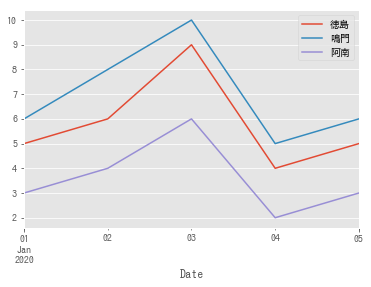

In [18]:
### データを描画
df.plot()